In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("/content/supermarket_sales.xlsx")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [5]:
df["DateTime"] = pd.to_datetime(df["Date"].dt.strftime('%Y-%m-%d') + ' ' + df["Time"].astype(str))
df["Hour"] = df["DateTime"].dt.hour

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,DateTime,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019-05-01 13:08:00,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019-08-03 10:29:00,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019-03-03 13:23:00,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,27,2019-01-27 20:33:00,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019-08-02 10:37:00,10


<ipython-input-7-649842913120>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Product line"], y=df["Total"], estimator=sum, ci=None, palette="viridis")
<ipython-input-7-649842913120>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Product line"], y=df["Total"], estimator=sum, ci=None, palette="viridis")


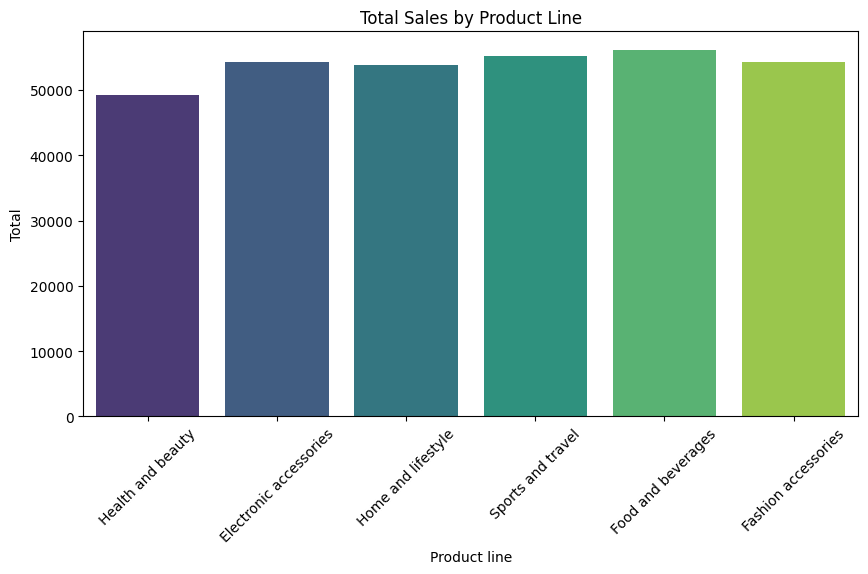

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["Product line"], y=df["Total"], estimator=sum, ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Sales by Product Line")
plt.show()

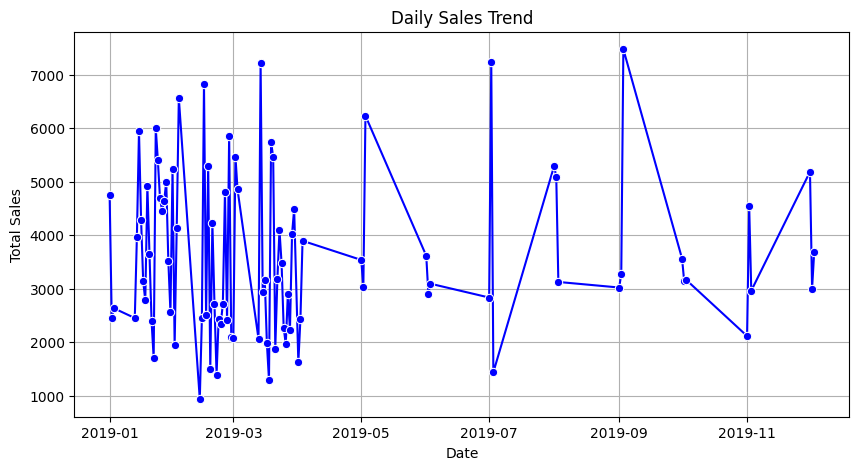

In [8]:
daily_sales = df.groupby("Date")["Total"].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker="o", color="b")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [9]:
df.to_csv("/content/supermarket_sales.csv", index=False)